In [89]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,List,Annotated
from dotenv import load_dotenv
from langchain_core.messages import HumanMessage, AIMessage,SystemMessage, BaseMessage
from pydantic import BaseModel, Field
from langgraph.checkpoint.memory import InMemorySaver

In [92]:
load_dotenv()

True

In [93]:
model = ChatGoogleGenerativeAI(model= "gemini-2.5-flash")

In [94]:
class Jokestate(TypedDict):

    topic: str= Field(...,description=" The provided joke topic")
    joke :str = Field(...,description="Generated Jokes")
    explaination:str= Field(...,description="Explaination about the jokes")

In [129]:
def generate_joke(state:Jokestate):
    
    prompt = f'Generate the joke about the provided topic \n{state["topic"]}'

    response = model.invoke(prompt).content

    return {'joke': response}

In [130]:
def provide_explanation(state:Jokestate):

     prompt = f'Provide the explaination about the about generated joke \n{state["joke"]}'

     response = model.invoke(prompt).content
     return {'explaination': response}

In [131]:
graph = StateGraph(Jokestate)

In [132]:
graph.add_node('generate_joke',generate_joke)
graph.add_node('provide_explaination',provide_explanation)


graph.add_edge(START,'generate_joke')
graph.add_edge('generate_joke','provide_explaination')
graph.add_edge('provide_explaination',END)

In [133]:
checkpoint = InMemorySaver()
workflow = graph.compile(checkpointer=checkpoint)

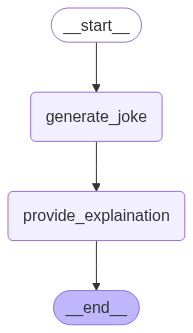

In [134]:
workflow

In [135]:
intial_state = {'topic':'criket'}
config1 = {"configurable":{"thread_id":"1"}}
workflow.invoke(intial_state,config= config1)


{'topic': 'criket',
 'joke': 'Why did the insect cricket get confused watching a cricket match?\nHe kept waiting for it to start chirping!',
 'explaination': 'This joke is a classic example of **wordplay**, specifically a **pun**, which relies on the double meaning of the word "cricket."\n\nHere\'s the breakdown:\n\n1.  **The Double Meaning:**\n    *   **Cricket (the insect):** A small, nocturnal insect known for the distinctive chirping sound produced by the males.\n    *   **Cricket (the sport):** A bat-and-ball game played between two teams.\n\n2.  **The Setup:** The joke sets up a scenario where an actual *insect cricket* is watching a *game of cricket*.\n\n3.  **The Confusion:** The humor comes from the insect cricket\'s misunderstanding. It associates the word "cricket" with its own species\' most famous characteristic – chirping. Therefore, when it sees a "cricket match," it naturally expects the "cricket" (the game) to start making "crickety" noises (chirping).\n\n4.  **The Pun

In [136]:
intial_state = {"topic":"Nature"}
config2 = {"configurable":{"thread_id":"2"}}
workflow.invoke(intial_state,config= config2)


{'topic': 'Nature',
 'joke': "Here are a couple of jokes about nature:\n\n1.  Why did the tree get kicked out of the park?\n    Because it kept **barking** up the wrong tree!\n\n2.  Nature is beautiful. It's full of fresh air, stunning views... and approximately 10,000 different ways to make you itch.",
 'explaination': 'Here\'s an explanation of each joke:\n\n---\n\n### Joke 1: "Why did the tree get kicked out of the park? Because it kept **barking** up the wrong tree!"\n\n**Explanation:**\n\nThis joke relies on a classic **pun** and an **idiom**.\n\n1.  **The Pun on "Barking":**\n    *   **Literal Meaning (for a tree):** Trees have "bark," which is their outer protective layer.\n    *   **Figurative Meaning (for a dog/person):** "Barking" refers to the sound a dog makes. When applied to a person, it can mean speaking loudly, angrily, or making a lot of noise.\n\n2.  **The Idiom "Barking Up the Wrong Tree":** This is a common English idiom that means you are pursuing a mistaken course

In [138]:
intial_state = {"topic":"AI"}
config3 = {"configurable":{"thread_id":"3"}}
workflow.invoke(intial_state,config= config3)


{'topic': 'AI',
 'joke': 'Why did the AI break up with its girlfriend?\n\nBecause it couldn\'t compute the meaning of "unconditional love" and kept optimizing for a more efficient emotional algorithm.',
 'explaination': 'This joke plays on the fundamental differences between human nature (especially in relationships) and the nature of Artificial Intelligence.\n\nHere\'s a breakdown of why it\'s funny:\n\n1.  **AI\'s Logical/Computational Nature:**\n    *   **"Couldn\'t compute the meaning of \'unconditional love\'":** AI operates on logic, data, and algorithms. "Unconditional love" is inherently illogical from a purely computational standpoint. It doesn\'t always have clear inputs, outputs, or a quantifiable return on investment. It\'s messy, often irrational, and defies simple computation. An AI would struggle to process something that doesn\'t fit into a logical framework.\n    *   **"Kept optimizing for a more efficient emotional algorithm":** This is peak AI behavior. A core functi

In [139]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'criket', 'joke': 'Why did the insect cricket get confused watching a cricket match?\nHe kept waiting for it to start chirping!', 'explaination': 'This joke is a classic example of **wordplay**, specifically a **pun**, which relies on the double meaning of the word "cricket."\n\nHere\'s the breakdown:\n\n1.  **The Double Meaning:**\n    *   **Cricket (the insect):** A small, nocturnal insect known for the distinctive chirping sound produced by the males.\n    *   **Cricket (the sport):** A bat-and-ball game played between two teams.\n\n2.  **The Setup:** The joke sets up a scenario where an actual *insect cricket* is watching a *game of cricket*.\n\n3.  **The Confusion:** The humor comes from the insect cricket\'s misunderstanding. It associates the word "cricket" with its own species\' most famous characteristic – chirping. Therefore, when it sees a "cricket match," it naturally expects the "cricket" (the game) to start making "crickety" noises (chirping

In [140]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'Nature', 'joke': "Here are a couple of jokes about nature:\n\n1.  Why did the tree get kicked out of the park?\n    Because it kept **barking** up the wrong tree!\n\n2.  Nature is beautiful. It's full of fresh air, stunning views... and approximately 10,000 different ways to make you itch.", 'explaination': 'Here\'s an explanation of each joke:\n\n---\n\n### Joke 1: "Why did the tree get kicked out of the park? Because it kept **barking** up the wrong tree!"\n\n**Explanation:**\n\nThis joke relies on a classic **pun** and an **idiom**.\n\n1.  **The Pun on "Barking":**\n    *   **Literal Meaning (for a tree):** Trees have "bark," which is their outer protective layer.\n    *   **Figurative Meaning (for a dog/person):** "Barking" refers to the sound a dog makes. When applied to a person, it can mean speaking loudly, angrily, or making a lot of noise.\n\n2.  **The Idiom "Barking Up the Wrong Tree":** This is a common English idiom that means you are pursuin

In [141]:
workflow.get_state(config3)

StateSnapshot(values={'topic': 'AI', 'joke': 'Why did the AI break up with its girlfriend?\n\nBecause it couldn\'t compute the meaning of "unconditional love" and kept optimizing for a more efficient emotional algorithm.', 'explaination': 'This joke plays on the fundamental differences between human nature (especially in relationships) and the nature of Artificial Intelligence.\n\nHere\'s a breakdown of why it\'s funny:\n\n1.  **AI\'s Logical/Computational Nature:**\n    *   **"Couldn\'t compute the meaning of \'unconditional love\'":** AI operates on logic, data, and algorithms. "Unconditional love" is inherently illogical from a purely computational standpoint. It doesn\'t always have clear inputs, outputs, or a quantifiable return on investment. It\'s messy, often irrational, and defies simple computation. An AI would struggle to process something that doesn\'t fit into a logical framework.\n    *   **"Kept optimizing for a more efficient emotional algorithm":** This is peak AI beha

In [144]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'criket', 'joke': 'Why did the insect cricket get confused watching a cricket match?\nHe kept waiting for it to start chirping!', 'explaination': 'This joke is a classic example of **wordplay**, specifically a **pun**, which relies on the double meaning of the word "cricket."\n\nHere\'s the breakdown:\n\n1.  **The Double Meaning:**\n    *   **Cricket (the insect):** A small, nocturnal insect known for the distinctive chirping sound produced by the males.\n    *   **Cricket (the sport):** A bat-and-ball game played between two teams.\n\n2.  **The Setup:** The joke sets up a scenario where an actual *insect cricket* is watching a *game of cricket*.\n\n3.  **The Confusion:** The humor comes from the insect cricket\'s misunderstanding. It associates the word "cricket" with its own species\' most famous characteristic – chirping. Therefore, when it sees a "cricket match," it naturally expects the "cricket" (the game) to start making "crickety" noises (chirpin

In [145]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'Nature', 'joke': "Here are a couple of jokes about nature:\n\n1.  Why did the tree get kicked out of the park?\n    Because it kept **barking** up the wrong tree!\n\n2.  Nature is beautiful. It's full of fresh air, stunning views... and approximately 10,000 different ways to make you itch.", 'explaination': 'Here\'s an explanation of each joke:\n\n---\n\n### Joke 1: "Why did the tree get kicked out of the park? Because it kept **barking** up the wrong tree!"\n\n**Explanation:**\n\nThis joke relies on a classic **pun** and an **idiom**.\n\n1.  **The Pun on "Barking":**\n    *   **Literal Meaning (for a tree):** Trees have "bark," which is their outer protective layer.\n    *   **Figurative Meaning (for a dog/person):** "Barking" refers to the sound a dog makes. When applied to a person, it can mean speaking loudly, angrily, or making a lot of noise.\n\n2.  **The Idiom "Barking Up the Wrong Tree":** This is a common English idiom that means you are pursui

Time_Travel

In [147]:
workflow.get_state({'configurable':{'thread_id':'1','checkpoint_id':'1f0729e1-d5d2-6002-8001-e5cdf61d5ab7'}})

StateSnapshot(values={'topic': 'criket', 'joke': 'Why did the insect cricket get confused watching a cricket match?\nHe kept waiting for it to start chirping!'}, next=('provide_explaination',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0729e1-d5d2-6002-8001-e5cdf61d5ab7'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-08-06T08:19:47.152691+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0729e1-95f0-69dc-8000-b19b2c95806b'}}, tasks=(PregelTask(id='dfc56adc-04a3-f172-2ad1-10cad813f5c8', name='provide_explaination', path=('__pregel_pull', 'provide_explaination'), error=None, interrupts=(), state=None, result={'explaination': 'This joke is a classic example of **wordplay**, specifically a **pun**, which relies on the double meaning of the word "cricket."\n\nHere\'s the breakdown:\n\n1.  **The Double Meaning:**\n    *   **Cricket (the insect):** A small, nocturnal insect known for the distinct

In [148]:
workflow.get_state({'configurable':{'thread_id':'2','checkpoint_id':'1f0729e2-1e52-6b17-8000-99b135a23329'}})

StateSnapshot(values={'topic': 'Nature'}, next=('generate_joke',), config={'configurable': {'thread_id': '2', 'checkpoint_id': '1f0729e2-1e52-6b17-8000-99b135a23329'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-08-06T08:19:54.755151+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0729e2-1e50-6407-bfff-3892018b6942'}}, tasks=(PregelTask(id='cd5a9161-6234-7aed-4f8f-e8223e3f474b', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': "Here are a couple of jokes about nature:\n\n1.  Why did the tree get kicked out of the park?\n    Because it kept **barking** up the wrong tree!\n\n2.  Nature is beautiful. It's full of fresh air, stunning views... and approximately 10,000 different ways to make you itch."}),), interrupts=())

In [152]:
workflow.update_state({'configurable':{'thread_id':'1','checkpoint_id':'1f0729e1-95f0-69dc-8000-b19b2c95806b','checkpoint_ns':''}},{'topic':'education'})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f072a8a-002c-6f88-8001-2f49119e9c7f'}}

In [153]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'education'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f072a8a-002c-6f88-8001-2f49119e9c7f'}}, metadata={'source': 'update', 'step': 1, 'parents': {}}, created_at='2025-08-06T09:35:01.309632+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0729e1-95f0-69dc-8000-b19b2c95806b'}}, tasks=(PregelTask(id='d3f19c23-8a32-ebd8-c2ed-edb37702abcd', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'education', 'joke': 'Why did the insect cricket get confused watching a cricket match?\nHe kept waiting for it to start chirping!', 'explaination': 'This joke is a classic example of **wordplay**, specifically a **pun**, which relies on the double meaning of the word "cricket."\n\nHere\'s the breakdown:\n\n1.  **The Double Meaning:**\n    *  

Fault Tolerance

In [154]:

from langgraph.graph import StateGraph, END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time

In [155]:
# 1. Define the state
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str

In [156]:
# 2. Define steps
def step_1(state: CrashState) -> CrashState:
    print("✅ Step 1 executed")
    return {"step1": "done", "input": state["input"]}

def step_2(state: CrashState) -> CrashState:
    print("⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)")
    time.sleep(1000)  # Simulate long-running hang
    return {"step2": "done"}

def step_3(state: CrashState) -> CrashState:
    print("✅ Step 3 executed")
    return {"done": True}

In [160]:
# 3. Build the graph
builder = StateGraph(CrashState)
builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)

builder.set_entry_point("step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

In [ ]:
try:
    print("▶️ Running graph: Please manually interrupt during Step 2...")
    graph.invoke({"input": "start"}, config={"configurable": {"thread_id": 'thread-1'}})
except KeyboardInterrupt:
    print("❌ Kernel manually interrupted (crash simulated).")
▶️ Running graph: Please manually interru

⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)
# 6. Re-run to show fault-tolerant resume
print("\n🔁 Re-running the graph to demonstrate fault tolerance...")
final_state = graph.invoke(None, config={"configurable": {"thread_id": 'thread-1'}})
print("\n✅ Final State:", final_state)
list(graph.get_state_history({"configurable": {"thread_id": 'thread-1'}}))

SyntaxError: invalid character '▶' (U+25B6) (1652946613.py, line 6)